<a href="https://colab.research.google.com/github/Suhas-S63/Wine_Quality_Classification/blob/main/ML_Project_Wine_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Overview**

#**Input Variables:**
- **Fixed Acidity:** Most acids involved with wine or fixed or nonvolatile
- **Volatile Acidity:** The amount of acetic acid in wine
- **Citric Acid:** Found in small quantities, citric acid can add 'freshness' and flavor to wines
- **Residual Sugar:** The amount of sugar remaining after fermentation stops
- **Chlorides:** The amount of salt in the wine
- **Free Sulfur Dioxide:**	The free form of SO2 exists in equilibrium between molecular SO^2 (as a dissolved gas) and bisulfite ion
- **Total Sulfur Dioxide:**	Amount of free and bound forms of S02
- **Density:** The density of water is close to that of water depending on the percent alcohol and sugar content
- **pH:** Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- **Sulphates:** A wine additive which can contribute to sulfur dioxide gas (S02) levels
- **Alcohol:** The percent alcohol content of the wine

#### **Output Variable**
- **Quality:** Output variable (based on sensory data, score between 0 and 10)



#**2. Importing Libraries and Reading Dataset**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from warnings import filterwarnings
filterwarnings(action='ignore')

import time

In [23]:
dataset = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**3. Preprocessing and Data Visualisation**

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:

print(dataset.shape)

(1599, 12)


## **3.1 Dataset Description**

In [28]:
dataset.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
dataset.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [30]:
dataset.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [31]:
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [32]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
dataset['quality'] = pd.cut(x = dataset['quality'], bins = bins, labels = labels)

In [33]:
dataset['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

## **3.2 Encoding for Quality(categorical value) column**

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['quality'] = encoder.fit_transform(dataset['quality'])

In [35]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


## **3.3 Correlation Matrix for relation between values**

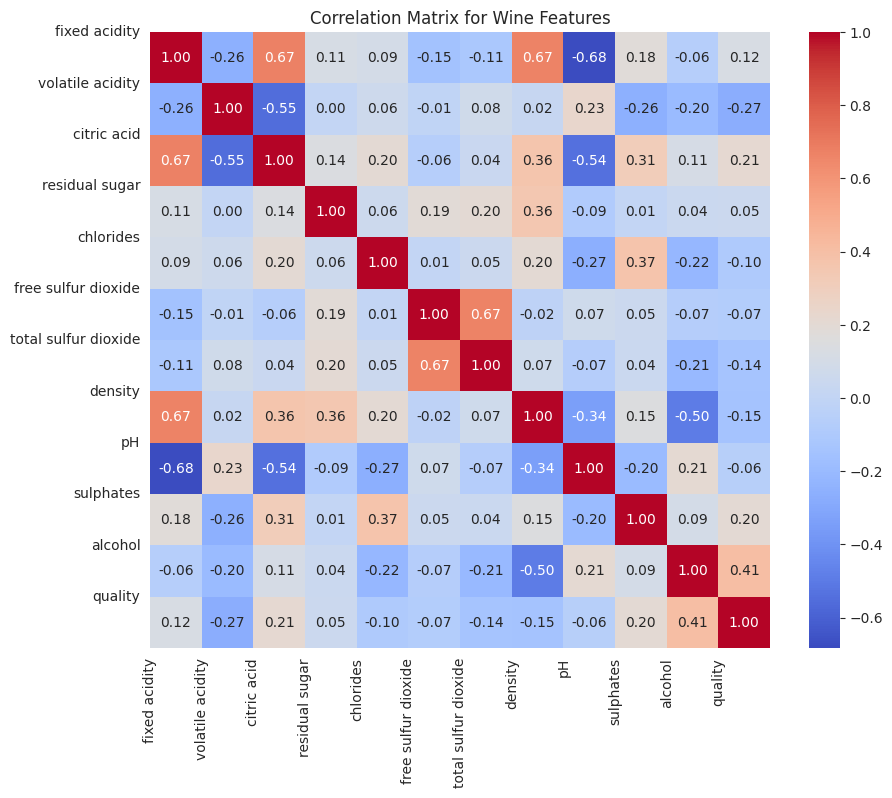

In [36]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix for Wine Features')
#show plot
plt.show()

**Some of the inferences that could be drawn from the correlation matrix:**

* Alcohol concentration and pH are both favourably
connected with wine quality. This implies that higher alcohol content and lower pH wines are generally evaluated as being of higher quality.

* Citric acidity and fixed acidity have a positive correlation. This is so because the grape variety and the growth environment have an impact on both acidity measurements.

* Total acidity and volatile acidity have a negative relationship. This implies that wines tend to have lower overall acidity and more volatile acidity.

* Density and residual sugar have a favourable relationship. Because sugar is denser than water, this is the case.

* Free sulfur dioxide and total sulfur dioxide are positively correlated with each other. This is because free sulfur dioxide is a byproduct of the winemaking process and total sulfur dioxide is the sum of free and bound sulfur dioxide.


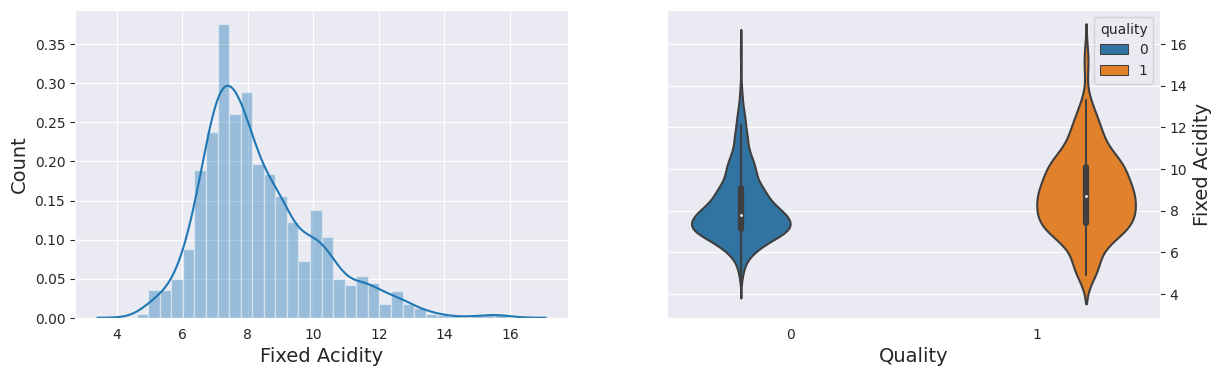

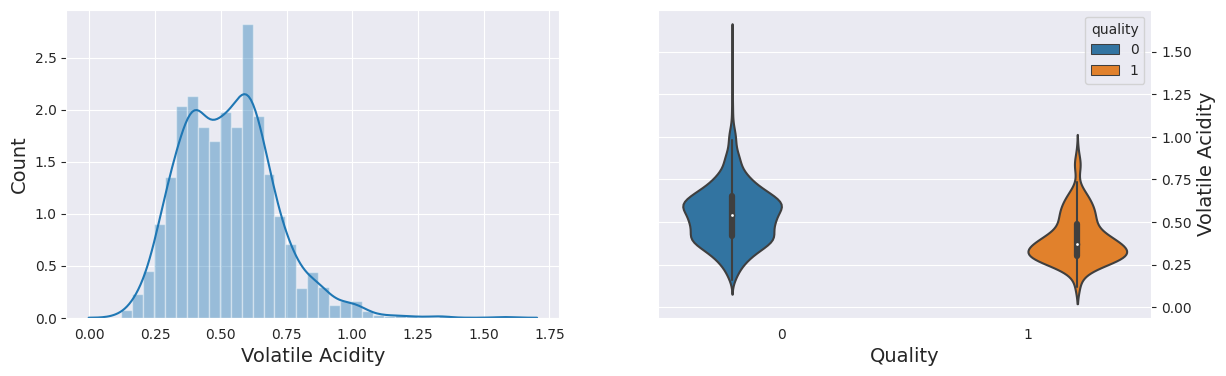

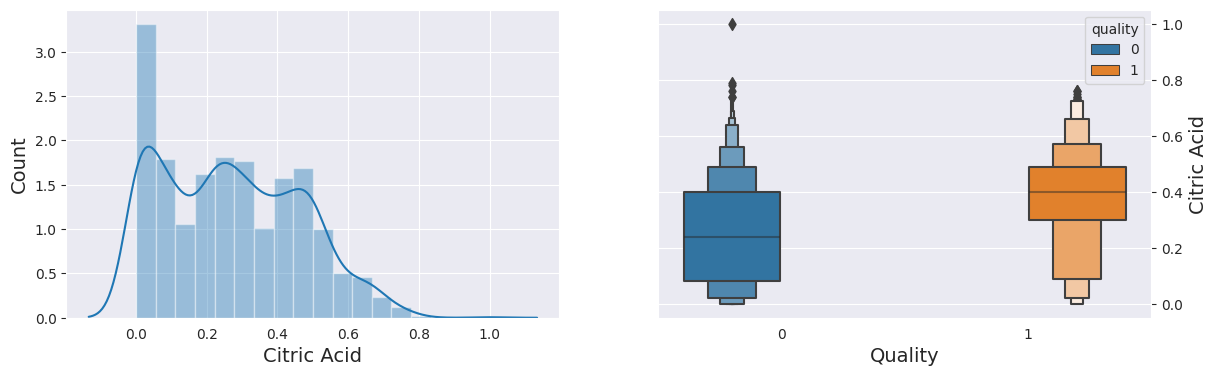

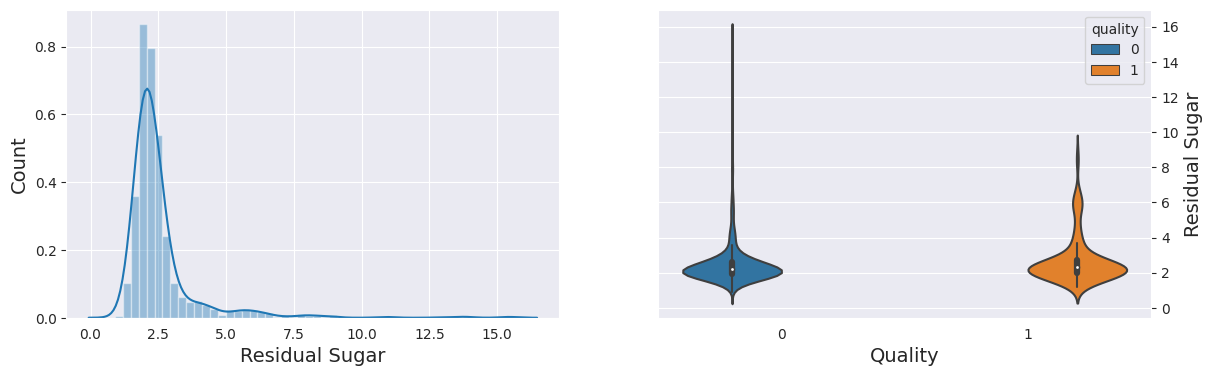

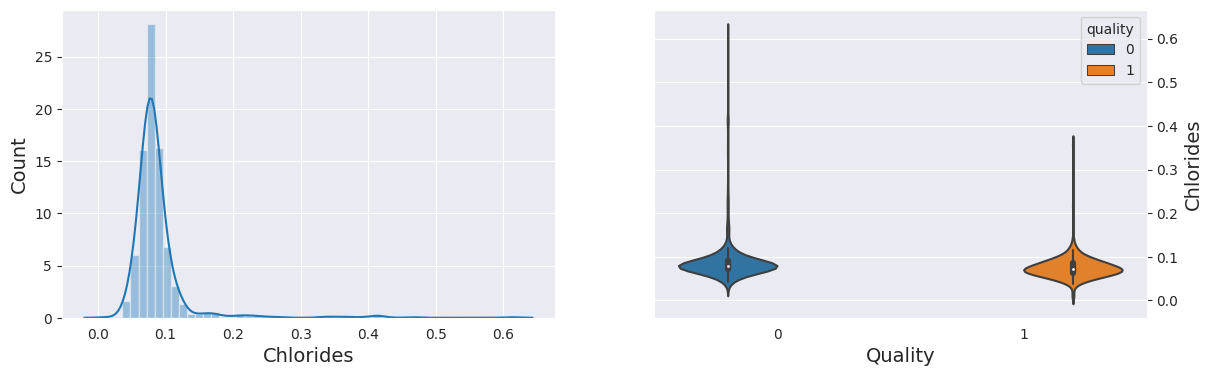

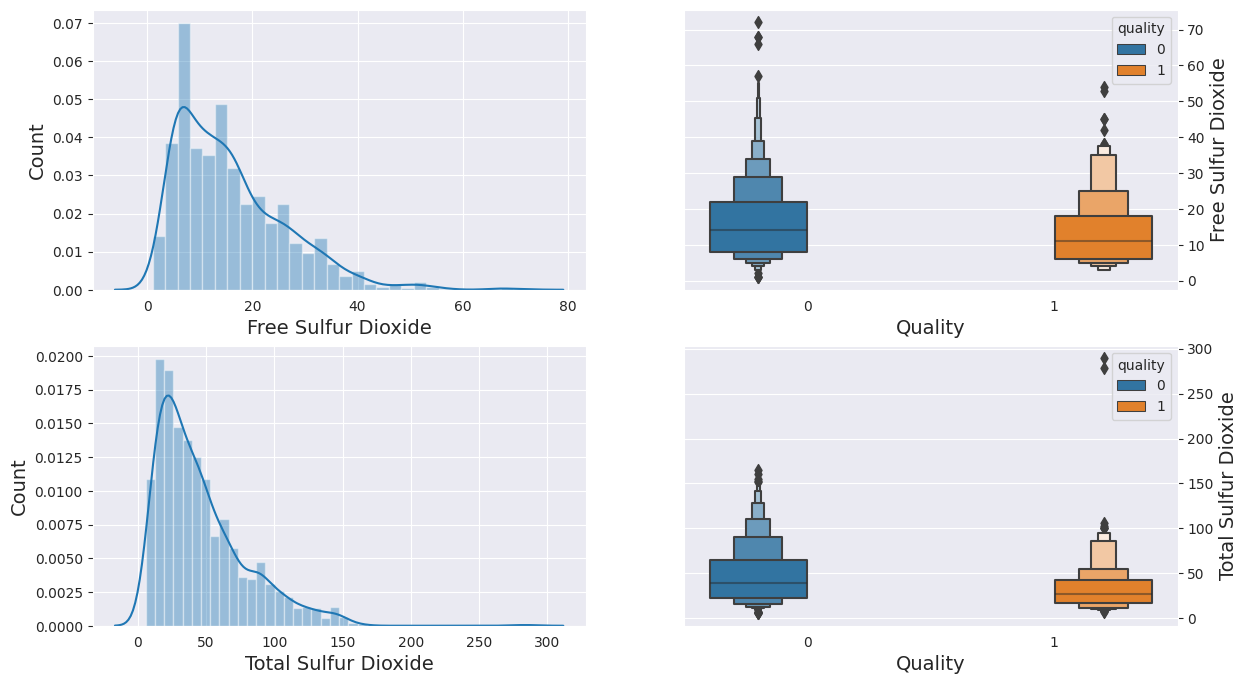

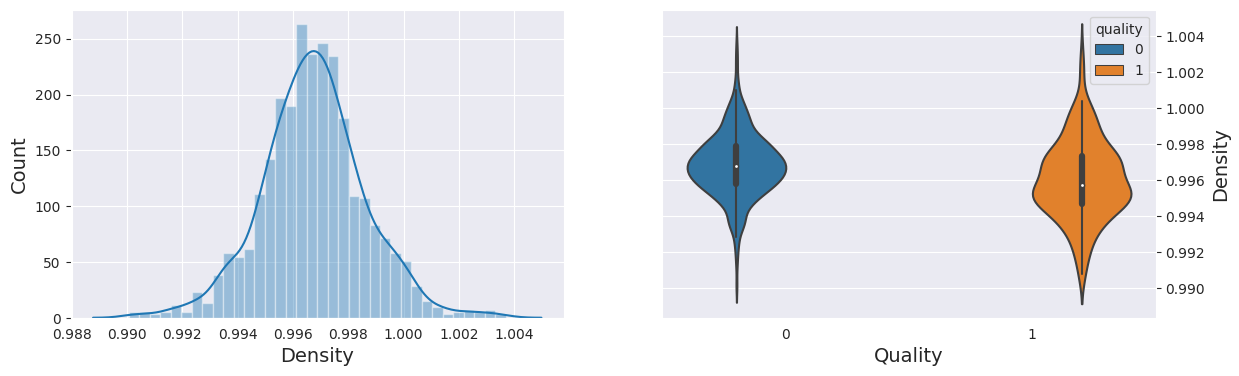

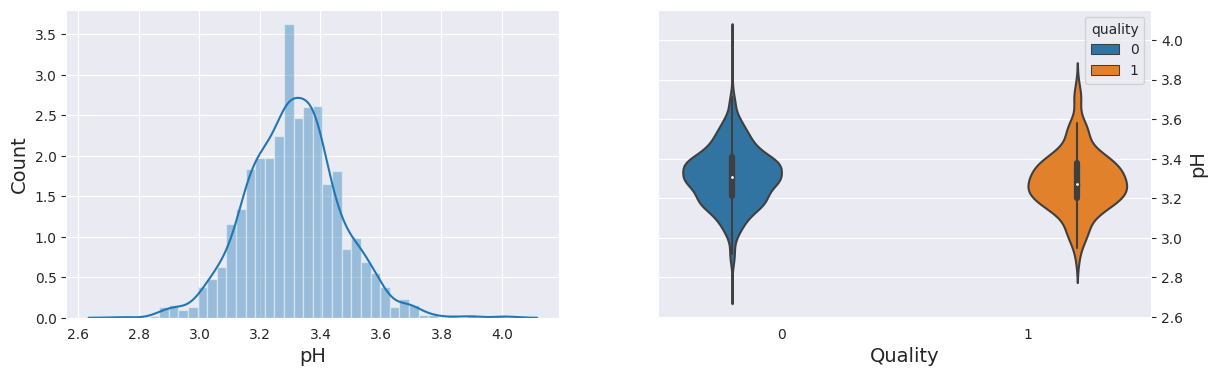

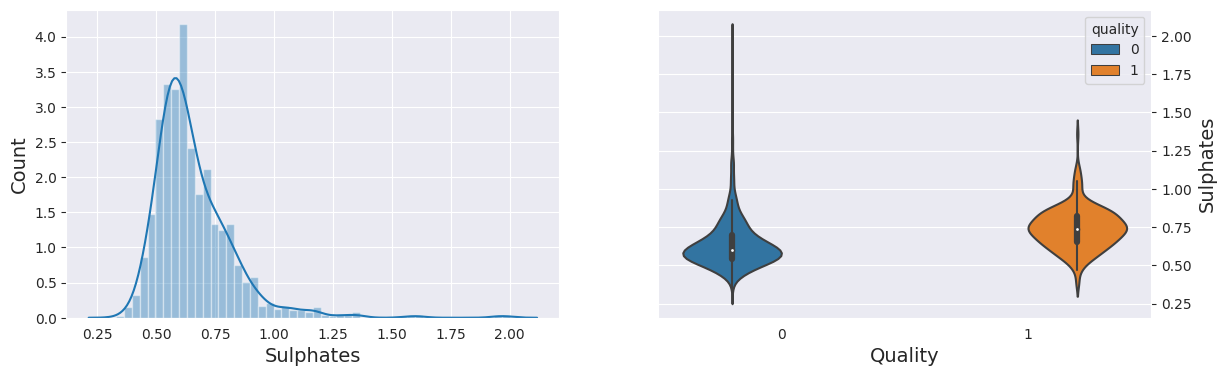

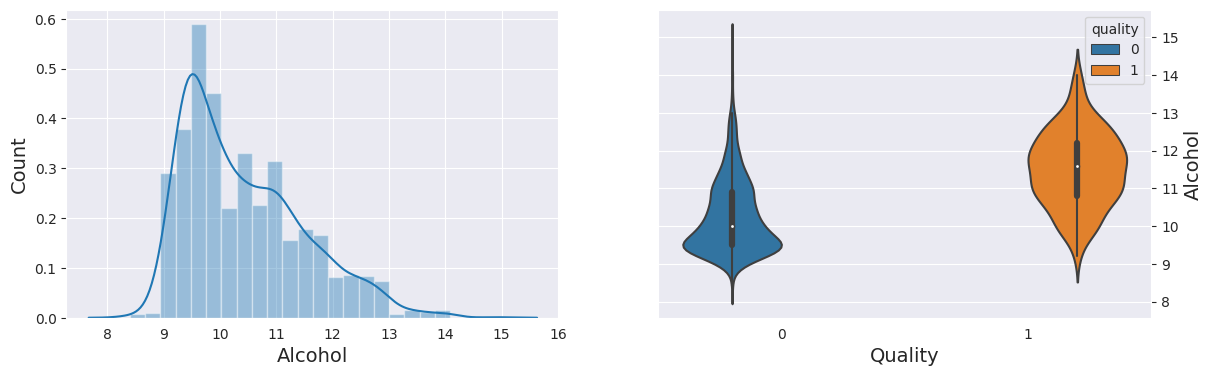

In [37]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['fixed acidity'], ax = axes[0])
axes[0].set_xlabel('Fixed Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'fixed acidity', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Fixed Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.show()


f, axes = plt.subplots(1,2,figsize=(14,4))
sns.distplot(dataset['volatile acidity'], ax = axes[0])
axes[0].set_xlabel('Volatile Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'volatile acidity', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Volatile Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.show()

f, axes = plt.subplots(1,2,figsize=(14,4))
sns.distplot(dataset['citric acid'], ax = axes[0])
axes[0].set_xlabel('Citric Acid', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'citric acid', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Citric Acid', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.show()

f, axes = plt.subplots(1,2,figsize=(14,4))
sns.distplot(dataset['residual sugar'], ax = axes[0])
axes[0].set_xlabel('Residual Sugar', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'residual sugar', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Residual Sugar', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.show()

f, axes = plt.subplots(1,2,figsize=(14,4))
sns.distplot(dataset['chlorides'], ax = axes[0])
axes[0].set_xlabel('Chlorides', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'chlorides', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Chlorides', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.show()

f, axes = plt.subplots(2,2,figsize=(14,8))

sns.distplot(dataset['free sulfur dioxide'], ax = axes[0,0])
axes[0,0].set_xlabel('Free Sulfur Dioxide', fontsize=14)
axes[0,0].set_ylabel('Count', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'free sulfur dioxide', data = dataset, hue = 'quality',ax = axes[0,1])
axes[0,1].set_xlabel('Quality', fontsize=14)
axes[0,1].set_ylabel('Free Sulfur Dioxide', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.distplot(dataset['total sulfur dioxide'], ax = axes[1,0])
axes[1,0].set_xlabel('Total Sulfur Dioxide', fontsize=14)
axes[1,0].set_ylabel('Count', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'total sulfur dioxide', data = dataset, hue = 'quality',ax = axes[1,1])
axes[1,1].set_xlabel('Quality', fontsize=14)
axes[1,1].set_ylabel('Total Sulfur Dioxide', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['density'], ax = axes[0])
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'density', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['pH'], ax = axes[0])
axes[0].set_xlabel('pH', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'pH', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('pH', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['sulphates'], ax = axes[0])
axes[0].set_xlabel('Sulphates', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'sulphates', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Sulphates', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['alcohol'], ax = axes[0])
axes[0].set_xlabel('Alcohol', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'alcohol', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Alcohol', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

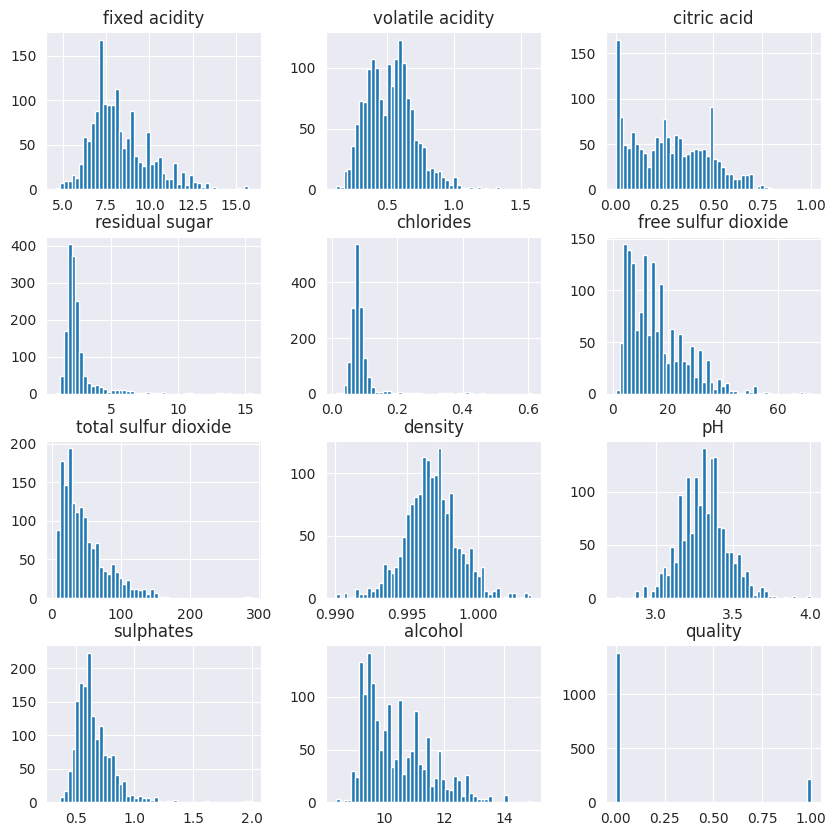

In [38]:
dataset.hist(figsize=(10,10),bins=50)
plt.show()

In [39]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [40]:
# Splitting the dataset into the Training set and Test set
X = dataset.drop('quality', axis = 1).values
Y = dataset['quality'].values.reshape(-1,1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify=Y)

In [41]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1119, 11)
Shape of X_test:  (480, 11)
Shape of y_train:  (1119, 1)
Shape of y_test (480, 1)


#**4. Classification Model Implementation and Prediction**

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## **4.1 Logistic Regression Model**

In [43]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
start_time = time.time()
classifier_lr.fit(X_train_scaled, y_train.ravel())
end_time = time.time()
lr_training_time = end_time - start_time

In [44]:
# Predicting Cross Validation Score
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.8748793436293436
Training set:  0.8811438784629133
Test set:  0.8875


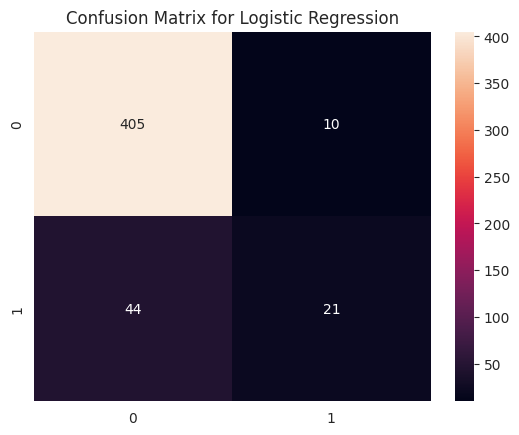

In [45]:
#Confusion Matrix for Model Performance
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test),annot=True,fmt='g')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [46]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

## **4.2 Support Vector Machine Model(Linear)**

In [47]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
start_time = time.time()
classifier_svm_linear.fit(X_train_scaled, y_train.ravel())
end_time = time.time()
svm_linear_training_time = end_time - start_time

In [48]:
# Predicting Cross Validation Score
cv_svm_linear = cross_val_score(estimator = classifier_svm_linear, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_linear.mean())

y_pred_svm_linear_train = classifier_svm_linear.predict(X_train_scaled)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test_scaled)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

CV:  0.8641650579150578
Training set:  0.8641644325290437
Test set:  0.8645833333333334


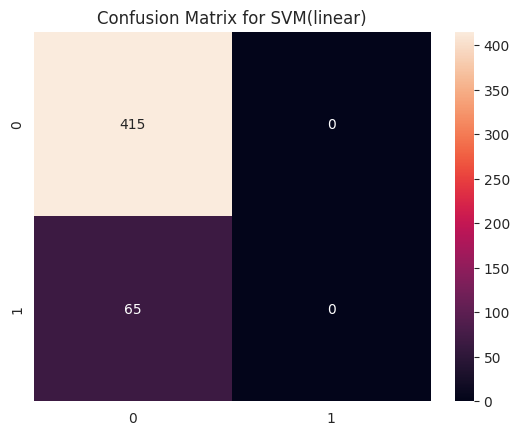

In [49]:
cm = confusion_matrix(y_test, y_pred_svm_linear_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix for SVM(linear)')
plt.show()

In [50]:
tp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,0]
fp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,1]
tn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,1]
fn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,0]

## **4.3 Support Vector Machine Model(Kernel)**

In [51]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC(kernel = 'rbf', C = 10, tol = 0.001, gamma = 'scale')
start_time = time.time()
classifier_svm_kernel.fit(X_train_scaled, y_train.ravel())
end_time = time.time()
svm_kernel_training_time = end_time - start_time

In [52]:
# Predicting Cross Validation Score
cv_svm_kernel = cross_val_score(estimator = classifier_svm_kernel, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_kernel.mean())

y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train_scaled)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test_scaled)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

CV:  0.8704231016731017
Training set:  0.9454870420017873
Test set:  0.9041666666666667


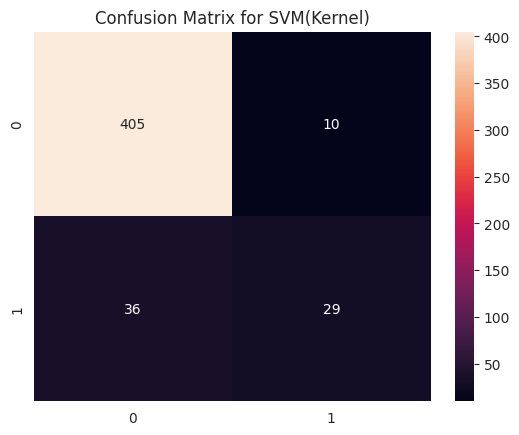

In [53]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_kernel_test),annot=True,fmt='g')
plt.title("Confusion Matrix for SVM(Kernel)")
plt.show()

In [54]:
tp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,0]
fp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,1]
tn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,1]
fn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,0]

## **4.4 Naive Bayes Model**

In [55]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
start_time = time.time()
classifier_nb.fit(X_train_scaled, y_train.ravel())
end_time = time.time()
nb_training_time = end_time - start_time

In [56]:
# Predicting Cross Validation Score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train_scaled)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test_scaled)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.8319337194337194
Training set:  0.837354781054513
Test set:  0.8458333333333333


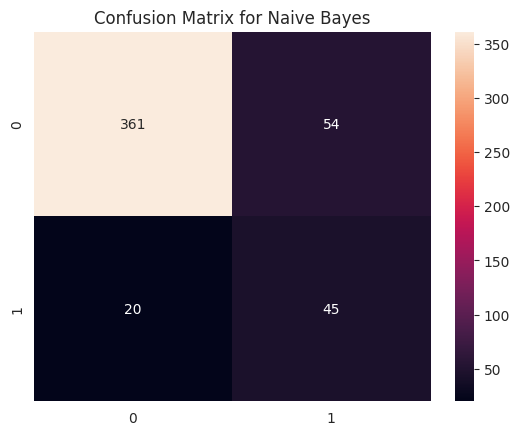

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test),annot=True,fmt='g')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

In [58]:
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]

## **4.5 Decision Tree**

In [59]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
start_time = time.time()
classifier_dt.fit(X_train_scaled, y_train.ravel())
end_time = time.time()
dt_training_time = end_time - start_time

In [60]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.8489623552123552
Training set:  1.0
Test set:  0.8875


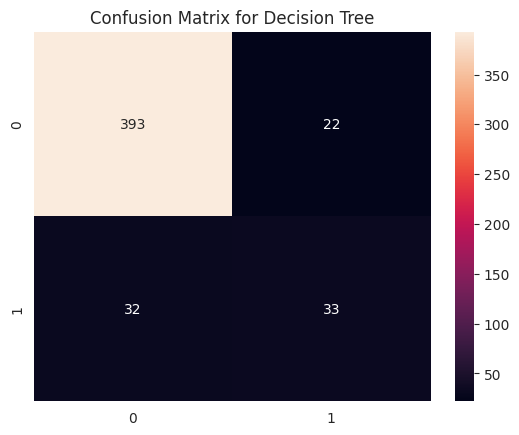

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test),annot=True,fmt='g')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

In [62]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

In [63]:
featuresf = list(dataset.columns)
featuresf.remove('quality')
print(featuresf)

targetf = 'quality'

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


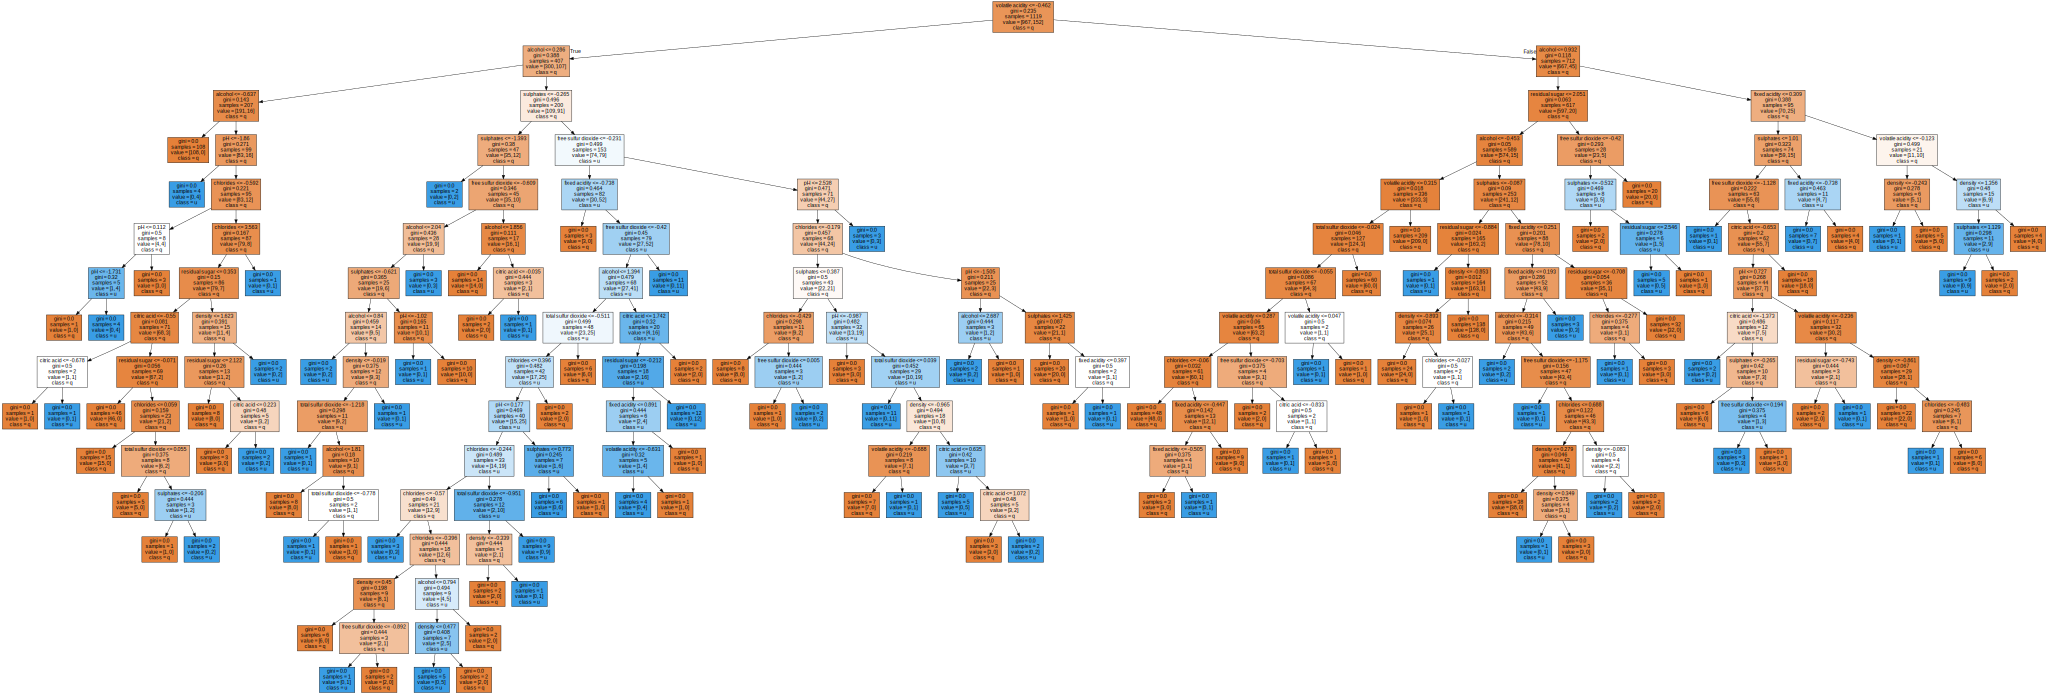

In [67]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(classifier_dt, out_file=None,
                                feature_names=featuresf,
                                class_names=targetf,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

## **4.6 Random Forest Classifier**

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
start_time = time.time()
rf_classifier.fit(X_train_scaled, y_train.ravel())
end_time = time.time()
rf_training_time = end_time - start_time

In [69]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = rf_classifier, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = rf_classifier.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = rf_classifier.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.8918677606177605
Training set:  1.0
Test set:  0.9270833333333334


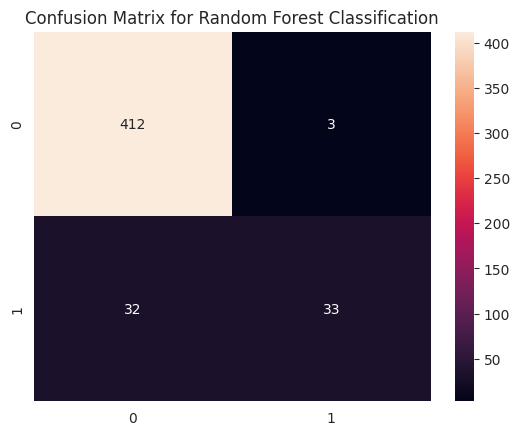

In [70]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test),annot=True,fmt='g')
plt.title("Confusion Matrix for Random Forest Classification")
plt.show()

In [71]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

##  **4.7 ExtraTreesClassifier**

In [72]:
# Initialize the Extra Trees classifier
et_classifier = ExtraTreesClassifier(random_state=42)

# Fit the model to the training data
start_time = time.time()
et_classifier.fit(X_train_scaled, y_train.ravel())
end_time = time.time()
et_training_time = end_time - start_time

In [73]:
# Predicting Cross Validation Score
cv_et = cross_val_score(estimator = et_classifier, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_et_train = et_classifier.predict(X_train_scaled)
accuracy_et_train = accuracy_score(y_train, y_pred_et_train)
print("Training set: ", accuracy_et_train)

y_pred_et_test = et_classifier.predict(X_test_scaled)
accuracy_et_test = accuracy_score(y_test, y_pred_et_test)
print("Test set: ", accuracy_et_test)


CV:  0.8918677606177605
Training set:  1.0
Test set:  0.93125


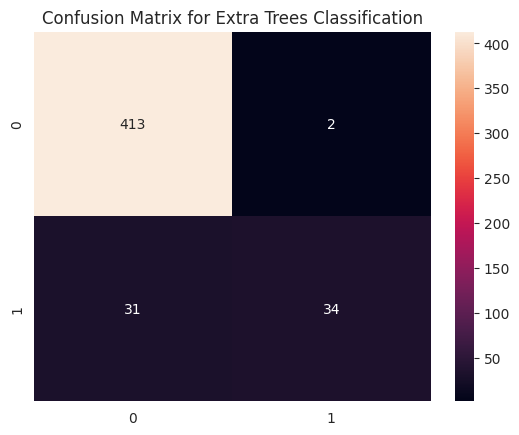

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred_et_test),annot=True,fmt='g')
plt.title("Confusion Matrix for Extra Trees Classification")
plt.show()

In [75]:
tp_et = confusion_matrix(y_test, y_pred_et_test)[0,0]
fp_et = confusion_matrix(y_test, y_pred_et_test)[0,1]
tn_et = confusion_matrix(y_test, y_pred_et_test)[1,1]
fn_et = confusion_matrix(y_test, y_pred_et_test)[1,0]

# **5. Measuring the Error**

In [76]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('SVM (Linear)', tp_svm_linear, fp_svm_linear, tn_svm_linear, fn_svm_linear, accuracy_svm_linear_train, accuracy_svm_linear_test, cv_svm_linear.mean()),
          ('SVM (Kernel)', tp_svm_kernel, fp_svm_kernel, tn_svm_kernel, fn_svm_kernel, accuracy_svm_kernel_train, accuracy_svm_kernel_test, cv_svm_kernel.mean()),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test, cv_nb.mean()),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('Random Forest Classification', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test, cv_rf.mean()),
          ('Extra Tree Classification', tp_et, fp_et, tn_et, fn_et, accuracy_et_train, accuracy_et_test, cv_et.mean())
         ]

In [77]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative','False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,Logistic Regression,405,10,21,44,0.881144,0.887500,0.874879
1,SVM (Linear),415,0,0,65,0.864164,0.864583,0.864165
2,SVM (Kernel),405,10,29,36,0.945487,0.904167,0.870423
3,Naive Bayes,361,54,45,20,0.837355,0.845833,0.831934
4,Decision Tree Classification,393,22,33,32,1.000000,0.887500,0.848962
5,Random Forest Classification,412,3,33,32,1.000000,0.927083,0.891868
6,Extra Tree Classification,413,2,34,31,1.000000,0.931250,0.901673


##  **5.1 Visualsing Models Performance**

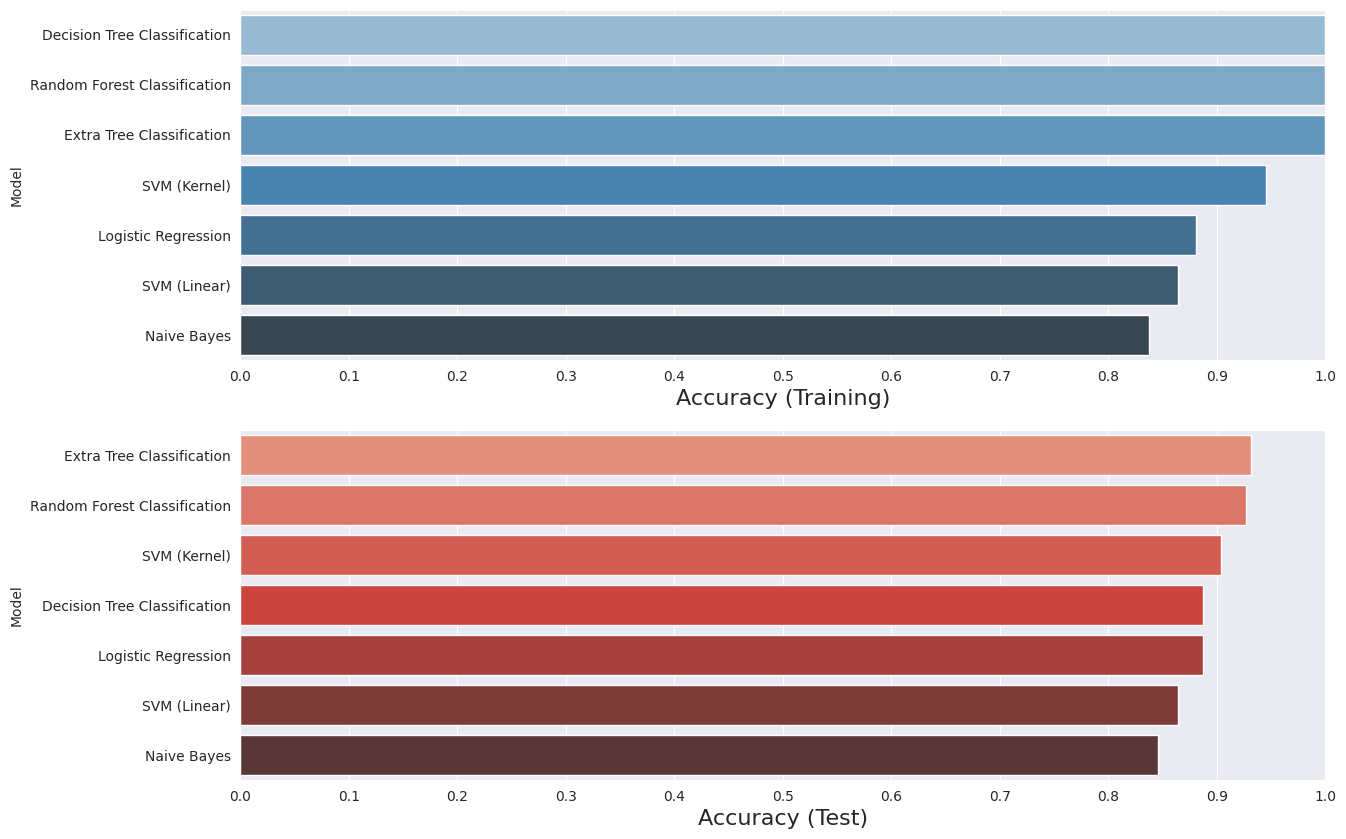

In [78]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

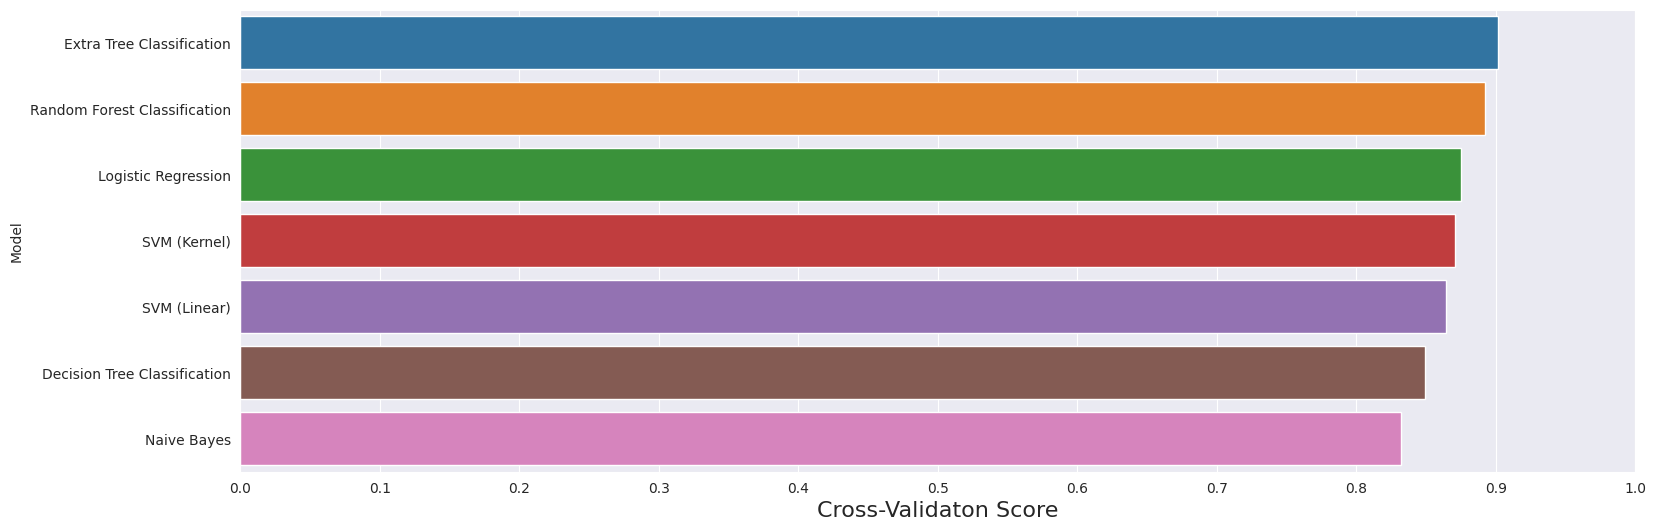

In [79]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

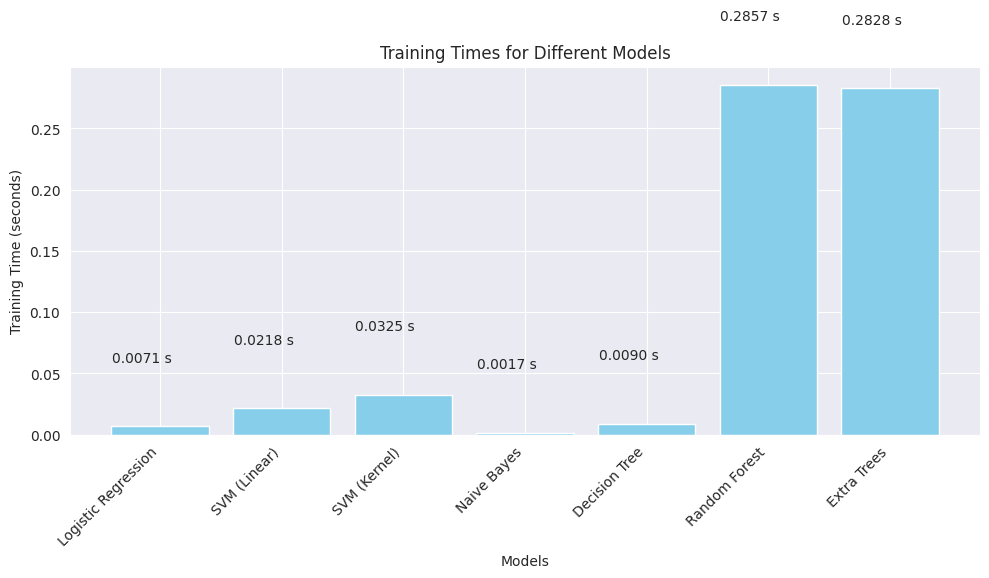

In [80]:
# List of models and their training times
models = ['Logistic Regression', 'SVM (Linear)', 'SVM (Kernel)', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Extra Trees']
training_times = [lr_training_time, svm_linear_training_time, svm_kernel_training_time, nb_training_time, dt_training_time, rf_training_time, et_training_time]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, training_times, color='skyblue')

# Annotate the bars with the exact timings
for bar, time in zip(bars, training_times):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, '{:.4f} s'.format(time), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Training Times for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

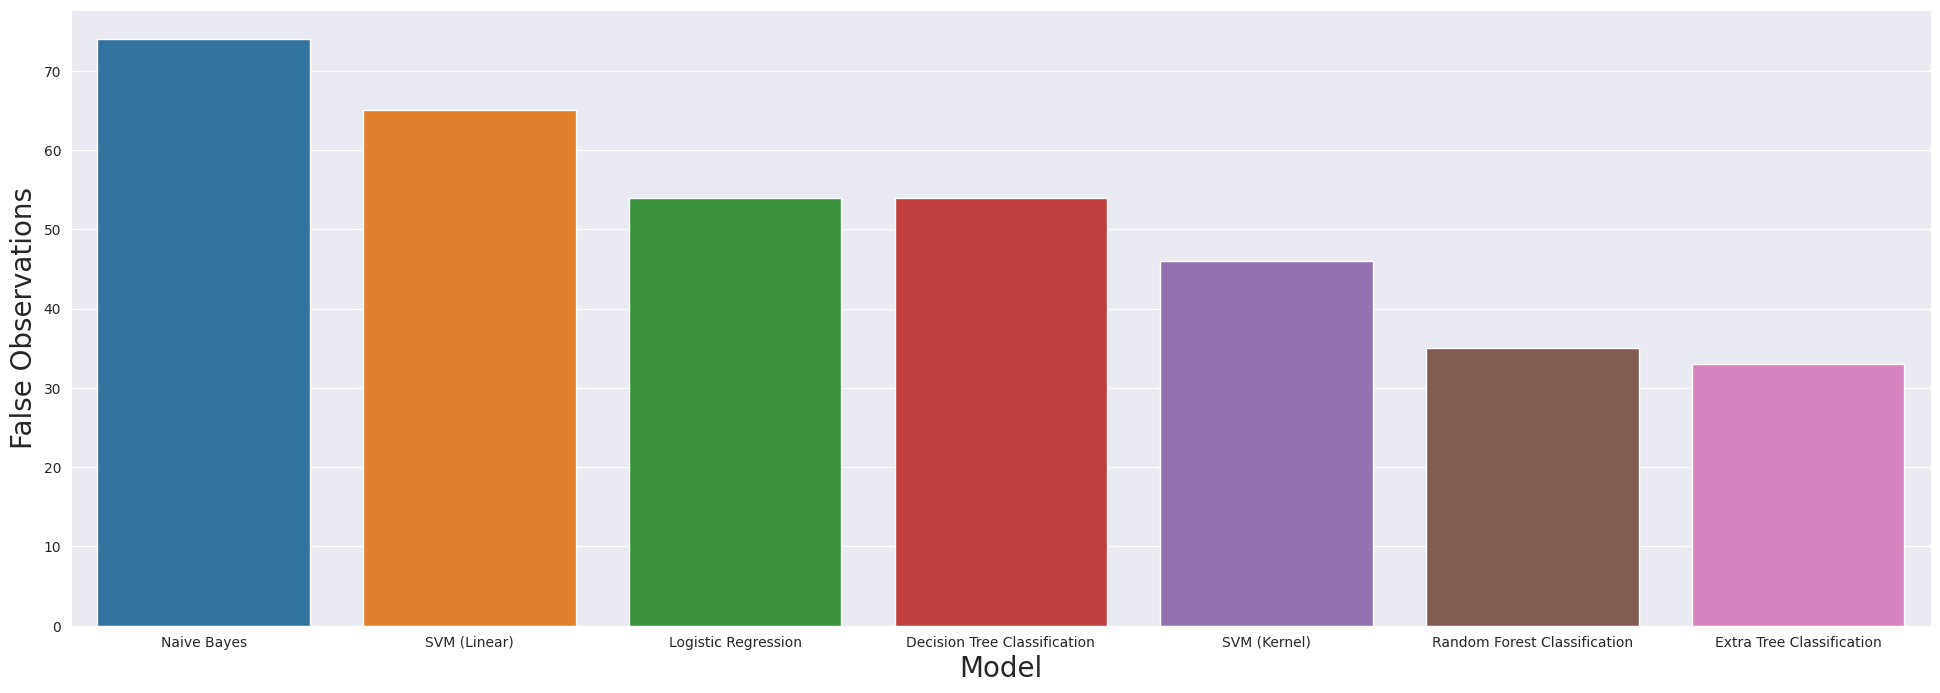

In [81]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()